

<font color='red' size='5'> Exercise 1: Implement Random Forests Classifier (car Dataset)</font>
1. Importing Required Libraries Let's first load the required libraries.
2. Loading Data: Let's first load the required dataset using pandas read CSV function.
3. Feature Selection: Here, you need to divide given columns into two types of variables
dependent (or target variable) and independent variable (or feature variables).
4. Splitting Data: To understand model performance, dividing the dataset into a training set
and a test set is a good strategy.
• Let's split the dataset by using function train_test_split(). You need to pass 3
parameters features, target, and test_set size.
5. Building Decision Tree Model: Let's create a Decision Tree Model using Scikit-learn.
6. Evaluating Model: Let's estimate, how accurately the classifier or model can predict the
different classes.
7. Accuracy can be computed by comparing actual test set values and predicted valu

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
df = pd.read_csv("car.csv")
df.head(10)

,buying,maint,doors,persons,lug_boot,safety,class_values
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
5,vhigh,vhigh,2,2,med,high,unacc
6,vhigh,vhigh,2,2,big,low,unacc
7,vhigh,vhigh,2,2,big,med,unacc
8,vhigh,vhigh,2,2,big,high,unacc
9,vhigh,vhigh,2,4,small,low,unacc


In [2]:
df.tail(10)

,buying,maint,doors,persons,lug_boot,safety,class_values
1718,low,low,5more,4,big,high,vgood
1719,low,low,5more,more,small,low,unacc
1720,low,low,5more,more,small,med,acc
1721,low,low,5more,more,small,high,good
1722,low,low,5more,more,med,low,unacc
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good
1727,low,low,5more,more,big,high,vgood


In [3]:
def buying_maint(value):
    if value=='vhigh':
        return 4
    elif value=='high':
        return 3
    elif value=='med':
        return 2
    else:
        return 1

In [4]:
df['buying'] = df['buying'].apply(buying_maint)
df['maint'] = df['maint'].apply(buying_maint)

In [5]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class_values
0,4,4,2,2,small,low,unacc
1,4,4,2,2,small,med,unacc
2,4,4,2,2,small,high,unacc
3,4,4,2,2,med,low,unacc
4,4,4,2,2,med,med,unacc


In [6]:
def door(value):
    if value == '5more':
        return 5
    elif value=='more':
        return 5
    else:
        return value  

In [7]:
df['doors'] = df['doors'].apply(door) 
df['persons'] = df['persons'].apply(door)

In [8]:
df.tail()

,buying,maint,doors,persons,lug_boot,safety,class_values
1723,1,1,5,5,med,med,good
1724,1,1,5,5,med,high,vgood
1725,1,1,5,5,big,low,unacc
1726,1,1,5,5,big,med,good
1727,1,1,5,5,big,high,vgood


In [9]:
def lug_safety(value):
    if value=='low':
        return 1
    elif value=='med':
        return 2
    elif value =='high':
        return 3

In [10]:
df['safety'] = df['safety'].apply(lug_safety)

In [11]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class_values
0,4,4,2,2,small,1,unacc
1,4,4,2,2,small,2,unacc
2,4,4,2,2,small,3,unacc
3,4,4,2,2,med,1,unacc
4,4,4,2,2,med,2,unacc


In [12]:
def lug_boots(value):
    if value=='small':
        return 1
    elif value=='med':
        return 2
    elif value =='big':
        return 3

In [13]:
df['lug_boot'] = df['lug_boot'].apply(lug_boots)

In [14]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class_values
0,4,4,2,2,1,1,unacc
1,4,4,2,2,1,2,unacc
2,4,4,2,2,1,3,unacc
3,4,4,2,2,2,1,unacc
4,4,4,2,2,2,2,unacc


In [15]:
def resultant(value):
    if value =='unacc':
        return 0
    elif value == 'acc':
        return 1
    elif value=='good':
        return 2
    elif value =='vgood':
        return 3

In [16]:
df['class_values'] = df['class_values'].apply(resultant)

In [17]:
df.tail()

,buying,maint,doors,persons,lug_boot,safety,class_values
1723,1,1,5,5,2,2,2
1724,1,1,5,5,2,3,3
1725,1,1,5,5,3,1,0
1726,1,1,5,5,3,2,2
1727,1,1,5,5,3,3,3


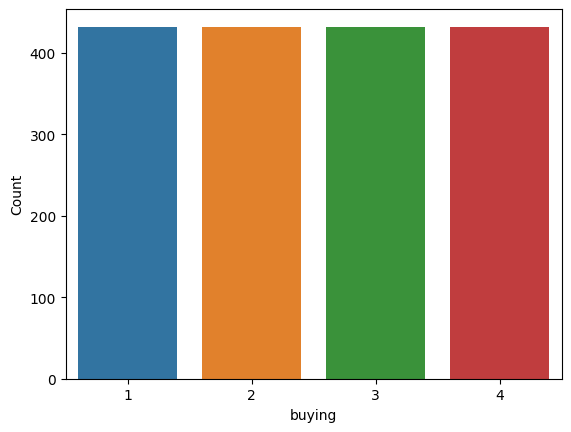

buying
4    432
3    432
2    432
1    432
Name: count, dtype: int64

In [18]:
import warnings

# Suppress FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)
import seaborn as sns
sns.countplot(x="buying", data=df)
plt.xlabel("buying")
plt.ylabel("Count")
plt.show()
df.loc[:,'buying'].value_counts()

In [19]:
from sklearn.model_selection import train_test_split


In [20]:
X = df.drop('class_values',axis=1)
Y= df['class_values']

In [21]:
X

,buying,maint,doors,persons,lug_boot,safety
0,4,4,2,2,1,1
1,4,4,2,2,1,2
2,4,4,2,2,1,3
3,4,4,2,2,2,1
4,4,4,2,2,2,2
...,...,...,...,...,...,...
1723,1,1,5,5,2,2
1724,1,1,5,5,2,3
1725,1,1,5,5,3,1
1726,1,1,5,5,3,2


In [22]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
1723    2
1724    3
1725    0
1726    2
1727    3
Name: class_values, Length: 1728, dtype: int64

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [24]:
len(X_train)

1209

In [25]:
len(X_test)

519

In [26]:
X_train

,buying,maint,doors,persons,lug_boot,safety
8,4,4,2,2,3,3
710,3,2,4,2,3,3
1281,2,1,5,4,2,1
1507,1,3,5,5,2,2
814,3,1,4,2,2,2
...,...,...,...,...,...,...
1039,2,3,4,4,2,2
1403,1,4,5,5,3,3
1592,1,2,4,5,3,3
71,4,4,4,4,3,3


In [27]:
X_test

,buying,maint,doors,persons,lug_boot,safety
280,4,2,4,4,1,2
330,4,1,2,2,3,1
635,3,3,5,4,2,3
399,4,1,4,5,2,1
2,4,4,2,2,1,3
...,...,...,...,...,...,...
855,3,1,5,5,1,1
1698,1,1,4,5,3,1
842,3,1,5,2,2,3
390,4,1,4,4,2,1


In [28]:
y_train

8       0
710     0
1281    0
1507    1
814     0
       ..
1039    1
1403    1
1592    3
71      0
418     1
Name: class_values, Length: 1209, dtype: int64

In [29]:
y_test

280     0
330     0
635     1
399     0
2       0
       ..
855     0
1698    0
842     0
390     0
1257    0
Name: class_values, Length: 519, dtype: int64

In [30]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [31]:
model = RandomForestClassifier(n_estimators=20)
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.9730250481695568

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       353
           1       0.98      0.91      0.95       128
           2       0.95      0.95      0.95        20
           3       1.00      0.89      0.94        18

    accuracy                           0.97       519
   macro avg       0.98      0.94      0.96       519
weighted avg       0.97      0.97      0.97       519



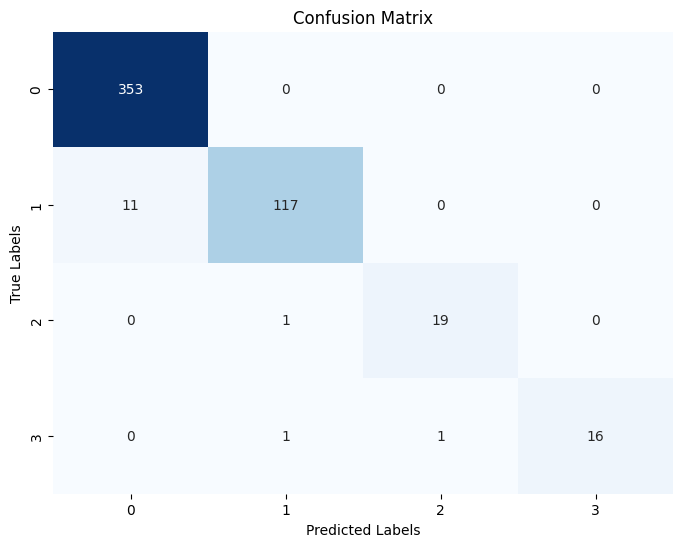

In [32]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Making predictions on the test set
y_pred = model.predict(X_test)

# Displaying the classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Displaying the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


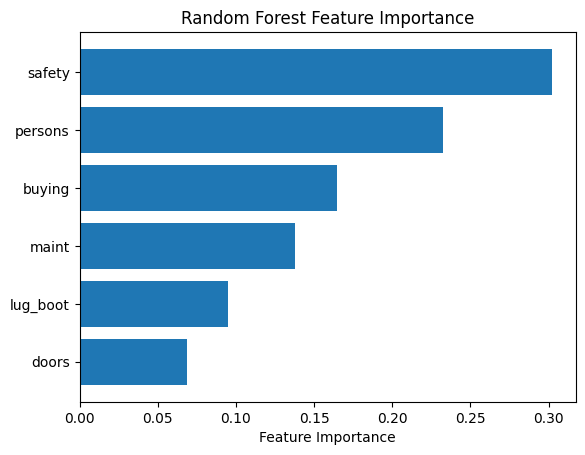

In [33]:
import matplotlib.pyplot as plt

feature_importance = model.feature_importances_
features = X_train.columns

# Sort the features by importance
sorted_idx = feature_importance.argsort()

plt.barh(range(len(features)), feature_importance[sorted_idx])
plt.yticks(range(len(features)), features[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.show()


In [38]:
from pdpbox import pdp, get_dataset, info_plots

# Choose the feature you want to create a PDP for
feature_to_plot = 'buying'

# Assuming 'df' is your DataFrame
pdp_goals = pdp.pdp_isolate(model, df, feature_to_plot)
pdp.pdp_plot(pdp_goals, feature_to_plot)
plt.show()


ImportError: cannot import name 'get_dataset' from 'pdpbox' (C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\pdpbox\__init__.py)

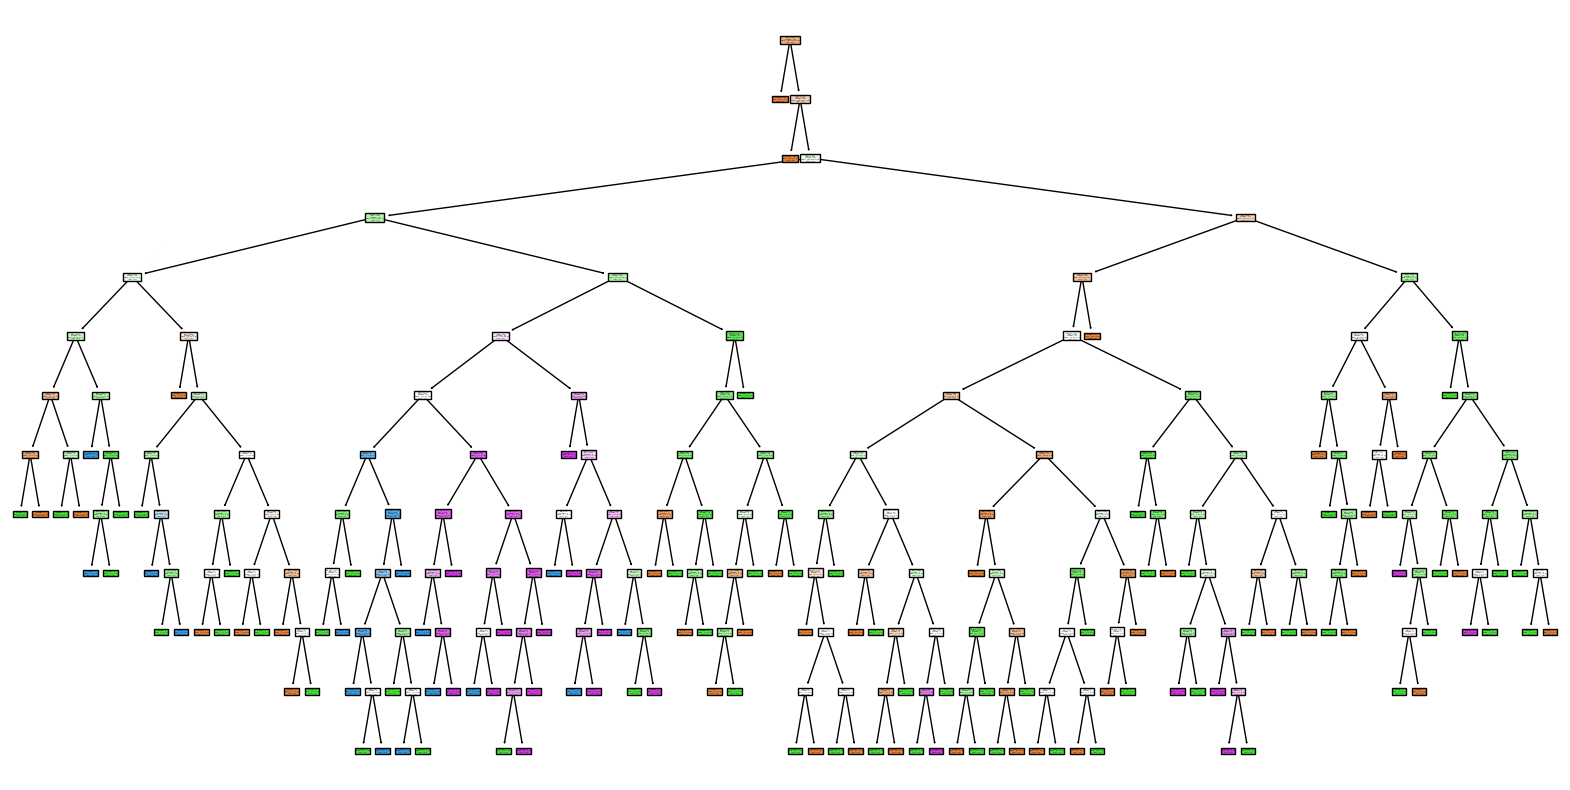

In [35]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
tree = model.estimators_[0]  # Visualizing the first tree in the forest
plot_tree(tree, filled=True, feature_names=X_train.columns, class_names=True)
plt.show()


In [39]:
from pdpbox import pdp, get_dataset, info_plots

# List of features you want to create PDPs for
features_to_plot = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']

# Create PDPs for each feature
for feature in features_to_plot:
    pdp_goals = pdp.pdp_isolate(model, df, feature)
    pdp.pdp_plot(pdp_goals, feature)

plt.show()


ImportError: cannot import name 'get_dataset' from 'pdpbox' (C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\pdpbox\__init__.py)